# Faris Abu Farha
# 1200546

# 0. Import the necessary libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1-Read the dataset and examine how many features and examples does it have?

In [84]:
df = pd.read_csv('data/cars.csv')
df.shape

(398, 8)

There are 8 features and 398 examples

## 2- Are there features with missing values? How many missing values are there in each one?

In [85]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64


from this output we can see how many missing values are there in each feature

## 3- Fill the missing values in each feature using a proper imputation method (for
example: fill with mean, median, or mode) 

In [86]:
df_cleaned = df.fillna({
    'horsepower': df['horsepower'].median(),
    'origin': df['origin'].mode()[0]

})
df_cleaned.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

 since the missing values in the horsepower feature are numerical, we can fill them with the median value, but We can't fill the missing values in the origin feature with the median value because it is a categorical feature, so we fill them with the mode value

## 4- Which country produces cars with better fuel economy?
(Hint: use box plot that shows the mpg for each country (all countries in one plot))

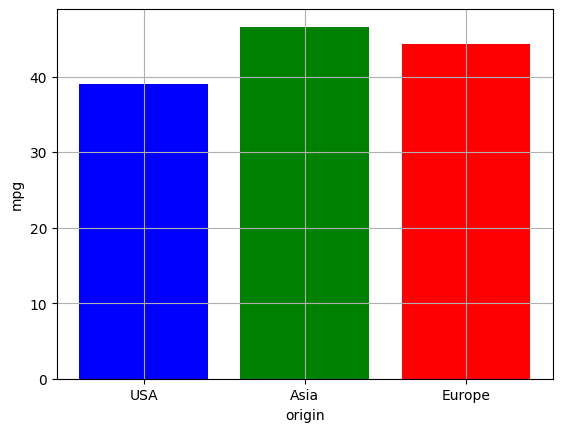

In [87]:
unique_origins = df_cleaned['origin'].unique()

# Set up a color map with a unique color for each origin
color_map = {'USA': 'blue', 'Asia': 'green', 'Europe': 'red'}

# Plot bars with specified colors
for origin in unique_origins:
    subset = df_cleaned[df_cleaned[
                            'origin'] == origin]  # df[df['origin'] == origin] is a subset of df where the origin is equal to the current origin in the loop
    plt.bar(subset['origin'], subset['mpg'], color=color_map[origin], label=origin)

plt.xlabel('origin')
plt.ylabel('mpg')
plt.grid()
plt.show()

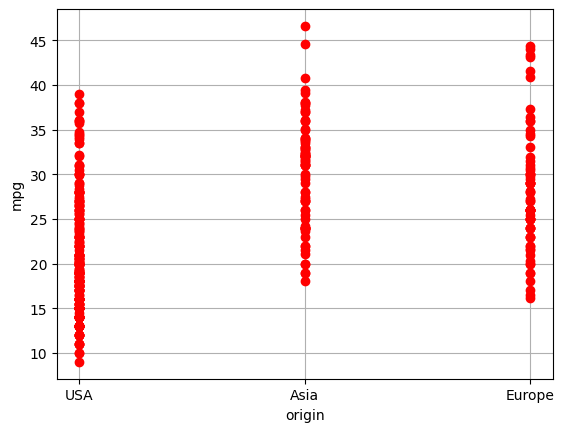

In [88]:
plt.plot(df_cleaned['origin'], df_cleaned['mpg'], 'o', color='red')  # plot the mpg for each country in one plot
plt.xlabel('origin')
plt.ylabel('mpg')
plt.grid()
plt.show()

from the previous plots we can see that the cars produced in Asia have better fuel economy

## 5- Which of the following features has a distribution that is most similar to a Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’? Answer this part by showing the histogram of each feature.

Text(0, 0.5, 'count')

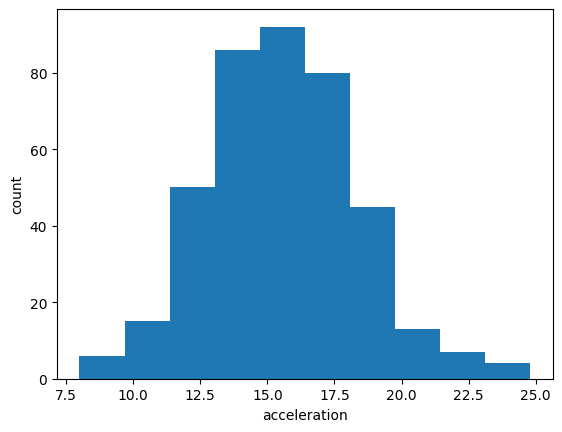

In [89]:
plt.hist(df_cleaned['acceleration'])
plt.xlabel('acceleration')
plt.ylabel('count')

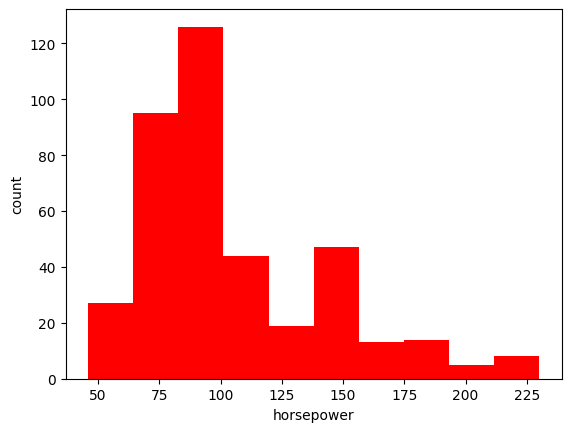

In [90]:
plt.hist(df_cleaned['horsepower'], color='red')
plt.xlabel('horsepower')
plt.ylabel('count')
plt.show()

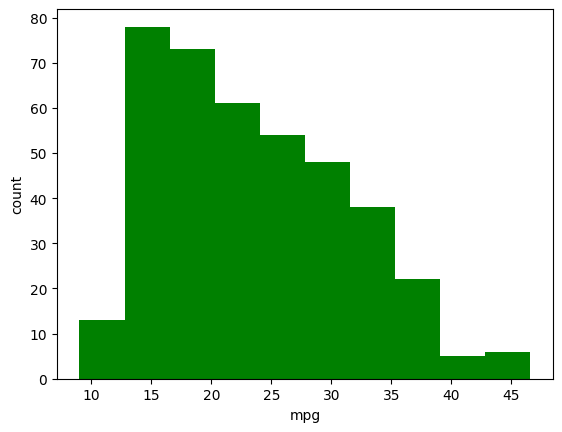

In [91]:
plt.hist(df_cleaned['mpg'], color='green')
plt.xlabel('mpg')
plt.ylabel('count')
plt.show()

from the previous plots we can see that the acceleration feature has a distribution that is most similar to a Gaussian

## 6- Support your answer for part 5 by using a quantitative measure.

In [92]:
# calculate the skewness for each feature
print('acceleration skewness: ', df_cleaned['acceleration'].skew())
print('acceleration kurtosis: ', df_cleaned['acceleration'].kurt())
print('=====================================')
print('horsepower skewness: ', df_cleaned['horsepower'].skew())
print('horsepower kurtosis: ', df_cleaned['horsepower'].kurt())
print('=====================================')
print('mpg skewness: ', df_cleaned['mpg'].skew())
print('mpg kurtosis: ', df_cleaned['mpg'].kurt())



acceleration skewness:  0.27877684462588986
acceleration kurtosis:  0.4194968829706842
horsepower skewness:  1.1062242930872614
horsepower kurtosis:  0.7635832666961107
mpg skewness:  0.45706634399491913
mpg kurtosis:  -0.5107812652123154


from the previous output we can see that the acceleration feature has a skewness value that is close to zero, which means that it has a distribution that is most similar to a Gaussian

## 7- Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis. Is there a correlation between them? Positive or negative?

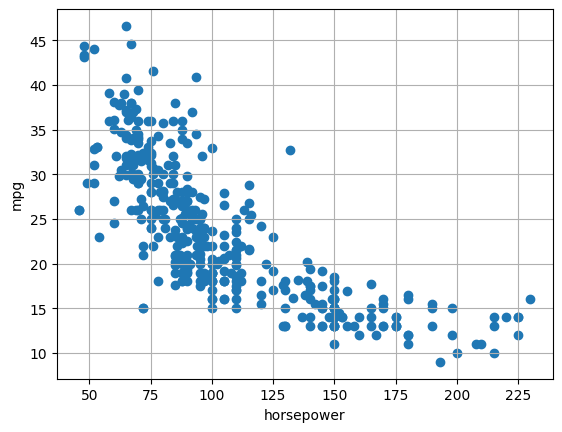

In [93]:
plt.scatter(df_cleaned['horsepower'], df_cleaned['mpg'])
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()
plt.show()

The scatter plot shows that there is a negative correlation between the horsepower and mpg features 

## 8. Implement the closed form solution of linear regression and use it to learn a linear model to predict the ‘mpg’ from the ‘horsepower’. Plot the learned line on the same scatter plot you got in part 7.
(Hint: This is a simple linear regression problem (one feature). Do not forget to add
x0=1 for the intercept. For inverting a matrix use np.linalg.inv from NumPy)

In [94]:
horsepower = (df_cleaned['horsepower'])
x0 = np.ones(len(horsepower))
X = pd.DataFrame({'x0': x0, 'horsepower': horsepower})

print(X)


      x0  horsepower
0    1.0       130.0
1    1.0       165.0
2    1.0       150.0
3    1.0       150.0
4    1.0       140.0
..   ...         ...
393  1.0        86.0
394  1.0        52.0
395  1.0        84.0
396  1.0        79.0
397  1.0        82.0

[398 rows x 2 columns]


In [95]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), np.array(df_cleaned['mpg']))
print(w)

[40.01131787 -0.1581602 ]


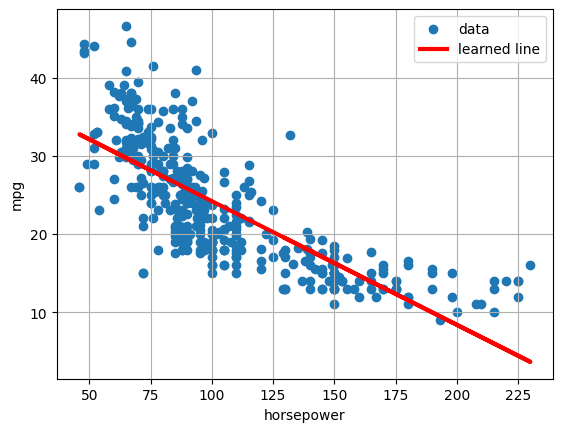

In [96]:
f = np.dot(X, w)
plt.scatter(df_cleaned['horsepower'], df_cleaned['mpg'])
plt.plot(df_cleaned['horsepower'], f, color='red', linewidth=3)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()
plt.legend(['data', 'learned line'])
plt.show()

## 9- Repeat part 8 but now learn a quadratic function of the form
f = w0 + w1x + w2x2.

In [97]:
X_quadratic = np.column_stack(
    (np.ones_like(df_cleaned['horsepower']), df_cleaned['horsepower'], df_cleaned['horsepower'] ** 2))

theta_quadratic = np.dot(np.dot(np.linalg.inv(np.dot(X_quadratic.T, X_quadratic)), X_quadratic.T),
                         np.array(df_cleaned['mpg']))

x_range_quadratic = np.linspace(df_cleaned['horsepower'].min(), df_cleaned['horsepower'].max(), len(df_cleaned))
# print(x_range_quadratic)
print('=====================================')
# print(np.array(df_cleaned['horsepower']))

# Create the corresponding feature matrix for the quadratic function
X_quadratic_range = np.column_stack((np.ones_like(x_range_quadratic), x_range_quadratic, x_range_quadratic ** 2))
theta_quadratic

array([ 5.67812082e+01, -4.62563379e-01,  1.21431773e-03])

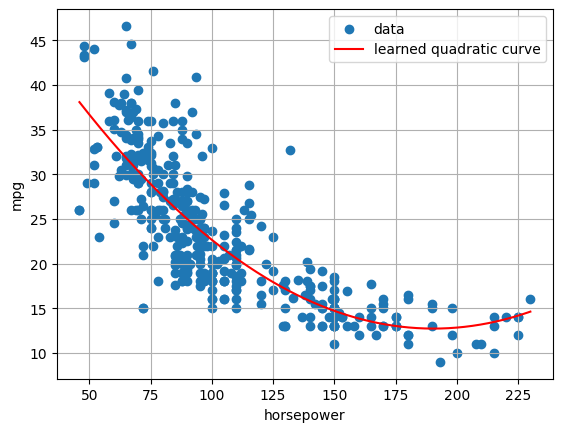

In [98]:

# Calculate the predicted values for the quadratic function
y_pred_quadratic = np.dot(X_quadratic_range, theta_quadratic)

plt.scatter(df_cleaned['horsepower'], df_cleaned['mpg'])
plt.plot(x_range_quadratic, y_pred_quadratic, color='red')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()
plt.legend(['data', 'learned quadratic curve'])
plt.show()


## 10- Repeat part 8 (simple linear regression case) but now by implementing the gradient descent algorithm instead of the closed form solution.

In [99]:
def gradient_descent(X, y, W, b, learning_rate, epochs = 2000000):
    n = len(X)
    for i in range(epochs):
        y_pred = W*X + b
        m_derivative = (-2/n) * X.dot((y - y_pred)) 
        c_derivative = (-2/n) * sum(y - y_pred)
        W-= learning_rate * m_derivative
        b-= learning_rate * c_derivative
    return W, b

In [100]:
X = df_cleaned['horsepower'].values
y = df_cleaned['mpg'].values
W = (np.random.random() - 0.5 )*2

b = 0
b_gradient = 0
W_gradient = 0
learning_rate = 0.00001
W, b= gradient_descent(X, y, W, b, learning_rate)
print("Learned Weights:", W)
print("Learned Bias:", b)
    


Learned Weights: -0.15515885588760045
Learned Bias: 39.65633494162497


values are pretty close to the values in part 8

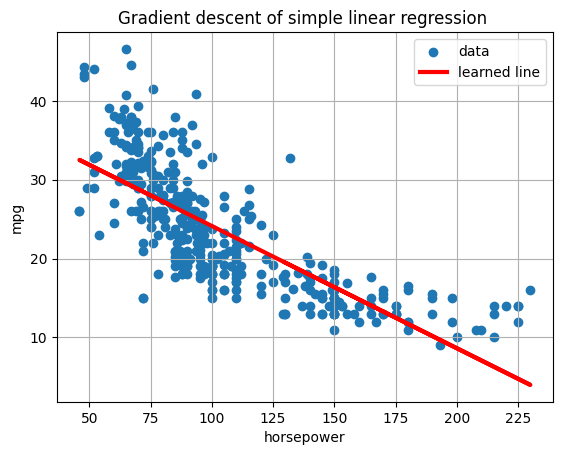

In [101]:
plt.scatter(df_cleaned['horsepower'], df_cleaned['mpg'])
plt.plot(df_cleaned['horsepower'], W*X  + b, color='red', linewidth=3)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()
plt.legend(['data', 'learned line'])
plt.title('Gradient descent of simple linear regression ')
plt.show()
